In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#sites = ['ADHD1',
#        'ADHD3',
#        'ADHD5',
#        'ADHD6',
#        'HSJ',
#        'Svip1',
#        'Svip2',
#        'SZ3',
#        'SZ6',
#        'UCLA_CB',
#        'UCLA_DS1',
#        'UKBB11025',
#        'UKBB11026',
#        'UKBB11027']

# Order by n in site
sites = [#'USM', # why this missing?
        'SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'SZ2',
        'SZ1',
        'UCLA_CB',
        'Svip1',
        'ADHD1',
        'ADHD3',
        'NYU',
        'ADHD5',
        'UCLA_DS1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025']

p_age = './results/age/'

# Load Data

In [25]:
# Single Task
st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [26]:
# Multi-task
mtl_data = []
for fold in range(4): # missing last fold
    p_parent = os.path.join(p_age, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


In [27]:
# Multi-task no UKBB
mtl_data_no_ukbb = []
for fold in range(5):
    p_parent = os.path.join(p_age, f"all_no_ukbb/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data_no_ukbb.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Loss

In [28]:
# Single Task
st_loss = []
st_loss_var = []
for site in sites:
    vals = [st_data[site][fold]['Loss/test'].iloc[-1] for fold in range(5)]
    st_loss.append(np.mean(vals))
    st_loss_var.append(np.var(vals))

st_loss = pd.Series(st_loss,index=sites)
st_loss_var = pd.Series(st_loss_var,index=sites)

In [29]:
# Multi-task
mtl_loss = []
for fold in range(4): # missing last fold
    df = mtl_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
    mtl_loss.append(df)
    
mtl_loss_var = pd.concat(mtl_loss,axis=1).var(axis=1)
mtl_loss = pd.concat(mtl_loss,axis=1).mean(axis=1)

In [30]:
# Multi-task no UKBB
mtl_loss_no_ukbb = []
for fold in range(5):
    df = mtl_data_no_ukbb[fold].transpose().reset_index()
    df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
    mtl_loss_no_ukbb.append(df)
    
mtl_loss_no_ukbb_var = pd.concat(mtl_loss_no_ukbb,axis=1).var(axis=1)
mtl_loss_no_ukbb = pd.concat(mtl_loss_no_ukbb,axis=1).mean(axis=1)

# Tables

In [31]:
df = pd.concat([st_loss,mtl_loss,st_loss_var,mtl_loss_var,mtl_loss_no_ukbb,mtl_loss_no_ukbb_var],axis=1)
df.columns = ['ST','MTL','ST_var','MTL_var','MTL_no_ukbb','MTL_no_ukbb_var']
df

,ST,MTL,ST_var,MTL_var,MTL_no_ukbb,MTL_no_ukbb_var
SZ3,13.445051,14.140224,28.292219,176.043600,11.978199,41.565785
SZ6,11.565257,7.225637,32.575848,8.516456,14.204214,89.355687
Svip2,13.100706,7.359330,25.007232,27.373925,4.785418,6.122893
ADHD6,0.185142,0.346925,0.008460,0.017609,0.253110,0.031094
HSJ,21.970699,20.501324,59.201747,119.361162,35.022453,92.495139
SZ2,19.448307,20.147567,90.604922,238.063326,13.594409,60.113807
SZ1,23.763197,21.857235,172.458097,23.317006,28.858098,444.628270
UCLA_CB,5.705241,5.545194,4.020034,24.386471,2.832970,1.451072
Svip1,25.537179,16.107686,157.529647,91.590638,17.023387,211.146177
ADHD1,0.414617,1.515768,0.007683,2.866679,0.588194,0.086338


In [32]:
df.mean()

ST                 10.260360
MTL                 8.417111
ST_var             34.804751
MTL_var            40.833047
MTL_no_ukbb        10.184371
MTL_no_ukbb_var    64.813544
dtype: float64

# Plots

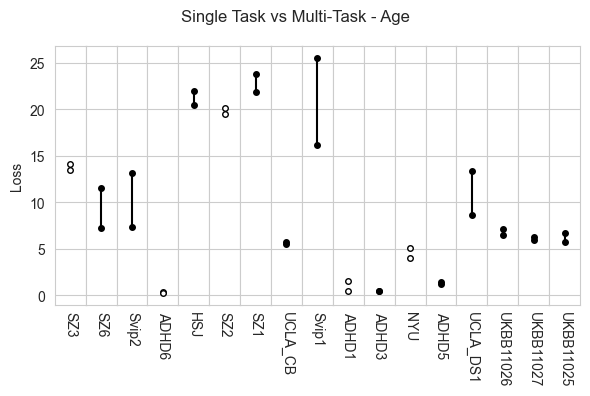

In [18]:
###############
# CONNECTOMES #
###############
title = 'Single Task vs Multi-Task - Age'
fig,ax = plt.subplots(1,len(sites),figsize=(6,4),sharey=True,sharex=True)
#plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_loss = df.loc[site]['ST']
    mtl_loss = df.loc[site]['MTL']
    # DIRECTION IS INVERTED FOR LOSS
    if st_loss < mtl_loss:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_loss,mtl_loss),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(sites[j],rotation=270)

ax[0].set_ylabel('Loss')
plt.suptitle(title)
#plt.ylim(30,100)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(p_age,'figures/st_vs_mtl.png'),dpi=300)

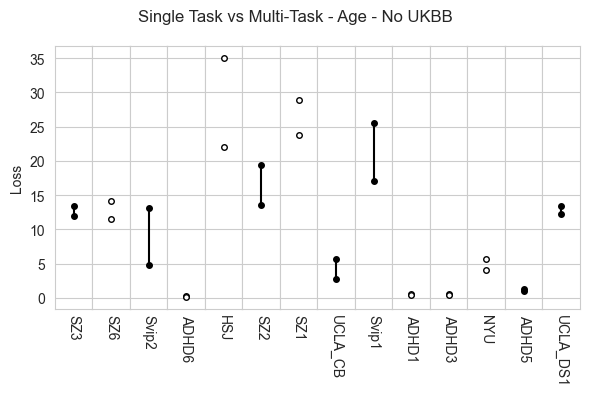

In [34]:
###############
# CONNECTOMES #
###############
sites_no_ukbb = [site for site in sites if site[:4]!='UKBB']
title = 'Single Task vs Multi-Task - Age - No UKBB'
fig,ax = plt.subplots(1,len(sites_no_ukbb),figsize=(6,4),sharey=True,sharex=True)
#plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites_no_ukbb):
    st_loss = df.loc[site]['ST']
    mtl_loss = df.loc[site]['MTL_no_ukbb']
    # DIRECTION IS INVERTED FOR LOSS
    if st_loss < mtl_loss:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_loss,mtl_loss),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(sites[j],rotation=270)

ax[0].set_ylabel('Loss')
plt.suptitle(title)
#plt.ylim(30,100)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(p_age,'figures/st_vs_mtl_no_ukbb.png'),dpi=300)

In [36]:
df['diff'] = df['MTL'] - df['ST']
df['diff_no_ukbb'] = df['MTL_no_ukbb'] - df['ST']

In [41]:
df[df.index.isin(sites_no_ukbb)].mean()

ST                 11.025725
MTL                 9.284512
ST_var             42.160213
MTL_var            52.136405
MTL_no_ukbb        10.614664
MTL_no_ukbb_var    68.510098
diff               -1.741212
diff_no_ukbb       -0.411061
dtype: float64